In [ ]:
# Knapsack problem solved classically and through DWave

# Detailed explanation is provided
# (c)2020 Alex Khan

In [ ]:
# In the knapsack problem we have a list of items i, from i-1 to i=N
# Each item has a weight w(i)
# and cost( equivalent to its value or price) c(i)

# The constraint is that the weight cannot exceed the capacity of the knapsack w_capacity

# The goal is to find a combination of items i_list where the maximum value c_max is achieved without 
# exceeding w_capacity. The maximum weight being carried would then be w_max for those items.

In [ ]:
# A number of approaches are available online, however, I will use an approach using the combination function
# To generate all unique combinations of items that could be filled in the knapsack

# I will then check to ensure the weight capacity is not exceeded. 
# For each combination I will check to see if its value is more than the stored maximum value of previous tries
# If it is more, then I will replace c_max and i_list

# At the end I will present the best option

In [ ]:
# The input file is a simple text file with the cost and then weight separated with a comma
# For example:

# 35,12
# 85,27
# 30,10
# 50,17
# 70,20
# 80,10
# 55,15


In [36]:
def import_file(file_name):
    import pandas as pd

    data_file_name="small_data.txt"
    w_capacity=30

    df = pd.read_csv(data_file_name, header=None)
    df.columns = ['cost', 'weight']
    print(df)
    
    c=df['cost']
    w=df['weight']
    return(c,w)

    

In [37]:
c,w=import_file("small_data.txt")
N=len(c)
print('i, cost')

for i in range(N):
    print(i, c[i])

print('i, weight')
for i in range(N):
    print(i, w[i])

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
i, cost
0 35
1 85
2 30
3 50
4 70
5 80
6 55
i, weight
0 12
1 27
2 10
3 17
4 20
5 10
6 15


In [20]:
from itertools import combinations
import numpy as np

for n in range(1,N):
    for i_list in combinations(np.arange(N), n):
        
        print(list(i_list))
        

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[3, 4]
[3, 5]
[3, 6]
[4, 5]
[4, 6]
[5, 6]
[0, 1, 2]
[0, 1, 3]
[0, 1, 4]
[0, 1, 5]
[0, 1, 6]
[0, 2, 3]
[0, 2, 4]
[0, 2, 5]
[0, 2, 6]
[0, 3, 4]
[0, 3, 5]
[0, 3, 6]
[0, 4, 5]
[0, 4, 6]
[0, 5, 6]
[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 2, 6]
[1, 3, 4]
[1, 3, 5]
[1, 3, 6]
[1, 4, 5]
[1, 4, 6]
[1, 5, 6]
[2, 3, 4]
[2, 3, 5]
[2, 3, 6]
[2, 4, 5]
[2, 4, 6]
[2, 5, 6]
[3, 4, 5]
[3, 4, 6]
[3, 5, 6]
[4, 5, 6]
[0, 1, 2, 3]
[0, 1, 2, 4]
[0, 1, 2, 5]
[0, 1, 2, 6]
[0, 1, 3, 4]
[0, 1, 3, 5]
[0, 1, 3, 6]
[0, 1, 4, 5]
[0, 1, 4, 6]
[0, 1, 5, 6]
[0, 2, 3, 4]
[0, 2, 3, 5]
[0, 2, 3, 6]
[0, 2, 4, 5]
[0, 2, 4, 6]
[0, 2, 5, 6]
[0, 3, 4, 5]
[0, 3, 4, 6]
[0, 3, 5, 6]
[0, 4, 5, 6]
[1, 2, 3, 4]
[1, 2, 3, 5]
[1, 2, 3, 6]
[1, 2, 4, 5]
[1, 2, 4, 6]
[1, 2, 5, 6]
[1, 3, 4, 5]
[1, 3, 4, 6]
[1, 3, 5, 6]
[1, 4, 5, 6]
[2, 3, 4, 5]
[2, 3, 4, 6]
[2, 3, 5, 6]
[2, 4, 5, 6]
[3, 4, 5, 6]
[0, 1, 2, 3, 4]
[0, 

In [ ]:
# We will use this loop to find the maximum weight w_max and cost c_max for a list of items i_list staying under w_capacity

In [50]:
def knapsack(file_name,w_capacity):
    from itertools import combinations
    import numpy as np
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    N=len(c)
    c_max=0
    w_max=0
    max_list=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): # allcombinations of n items
            
            if sum(list(i_list),w)<=w_capacity: # if the weight of the current list of items is within the weight capacity
                if sum(list(i_list),c)>c_max:  # if the cost of the current list of items is more than the max cost found so far

                    c_max=sum(list(i_list),c)  #c_max updated the cost of the current list of items
                    w_max=sum(list(i_list),w)  #w_max upated to the weifht of the current items
                    max_list=list(i_list)
                    print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))

    return(max_list, c_max, w_max)

In [70]:
max_list=[]
max_list, c_max, w_max=knapsack("small_data.txt", 50)

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 35
[1] 27 85
[0, 1] 39 120
[1, 3] 44 135
[1, 4] 47 155
[1, 5] 37 165
[0, 1, 5] 49 200
[4, 5, 6] 45 205


In [71]:
print(max_list, w_max, c_max)

[4, 5, 6] 45 205


In [ ]:
# Looking at the landscape of values within the weight constraint

In [65]:
def plot_knapsack(file_name,w_capacity):
    from itertools import combinations
    import numpy as np
    import matplotlib.pyplot as plt
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    N=len(c)
    c_max=0
    w_max=0
    max_list=[]
    
    plot_w=[]
    plot_c=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): # allcombinations of n items
            
            if sum(list(i_list),w)<=w_capacity: # if the weight of the current list of items is within the weight capacity
                if sum(list(i_list),c)>c_max:  # if the cost of the current list of items is more than the max cost found so far

                    plot_c.append(sum(list(i_list),c))  #c_max updated the cost of the current list of items
                    plot_w.append(sum(list(i_list),w))  #w_max upated to the weifht of the current items
                    max_list=list(i_list)
                    print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))
    plt.plot(plot_c)
    plt.ylabel('cost with constraint')
    plt.show()
    plt.plot(plot_w)
    plt.ylabel('weight with constraint')
    plt.show()
    return

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 35
[1] 27 85
[2] 10 30
[3] 17 50
[4] 20 70
[5] 10 80
[6] 15 55
[0, 1] 39 120
[0, 2] 22 65
[0, 3] 29 85
[0, 4] 32 105
[0, 5] 22 115
[0, 6] 27 90
[1, 2] 37 115
[1, 3] 44 135
[1, 4] 47 155
[1, 5] 37 165
[1, 6] 42 140
[2, 3] 27 80
[2, 4] 30 100
[2, 5] 20 110
[2, 6] 25 85
[3, 4] 37 120
[3, 5] 27 130
[3, 6] 32 105
[4, 5] 30 150
[4, 6] 35 125
[5, 6] 25 135
[0, 1, 2] 49 150
[0, 1, 5] 49 200
[0, 2, 3] 39 115
[0, 2, 4] 42 135
[0, 2, 5] 32 145
[0, 2, 6] 37 120
[0, 3, 4] 49 155
[0, 3, 5] 39 165
[0, 3, 6] 44 140
[0, 4, 5] 42 185
[0, 4, 6] 47 160
[0, 5, 6] 37 170
[1, 2, 5] 47 195
[2, 3, 4] 47 150
[2, 3, 5] 37 160
[2, 3, 6] 42 135
[2, 4, 5] 40 180
[2, 4, 6] 45 155
[2, 5, 6] 35 165
[3, 4, 5] 47 200
[3, 5, 6] 42 185
[4, 5, 6] 45 205
[0, 2, 3, 5] 49 195
[0, 2, 5, 6] 47 200


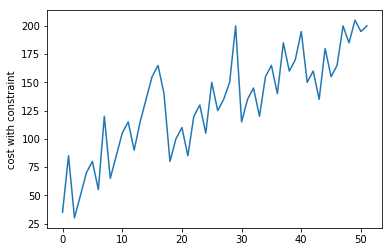

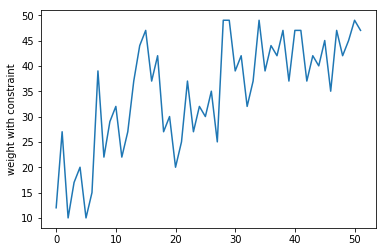

In [69]:
plot_knapsack("small_data.txt", 50)

In [ ]:
# Now look at the whole landscape excluding the weight constraint

In [67]:
def plot_all(file_name):
    from itertools import combinations
    import numpy as np
    import matplotlib.pyplot as plt
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    N=len(c)
    c_max=0
    w_max=0
    max_list=[]
    
    plot_w=[]
    plot_c=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): # allcombinations of n items
            
            
            
            plot_c.append(sum(list(i_list),c))  #c_max updated the cost of the current list of items
            plot_w.append(sum(list(i_list),w))  #w_max upated to the weifht of the current items
            max_list=list(i_list)
            print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))
    plt.plot(plot_c)
    plt.ylabel('cost without constraint')
    plt.show()
    plt.plot(plot_w)
    plt.ylabel('weight without constraint')
    plt.show()
    return

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 35
[1] 27 85
[2] 10 30
[3] 17 50
[4] 20 70
[5] 10 80
[6] 15 55
[0, 1] 39 120
[0, 2] 22 65
[0, 3] 29 85
[0, 4] 32 105
[0, 5] 22 115
[0, 6] 27 90
[1, 2] 37 115
[1, 3] 44 135
[1, 4] 47 155
[1, 5] 37 165
[1, 6] 42 140
[2, 3] 27 80
[2, 4] 30 100
[2, 5] 20 110
[2, 6] 25 85
[3, 4] 37 120
[3, 5] 27 130
[3, 6] 32 105
[4, 5] 30 150
[4, 6] 35 125
[5, 6] 25 135
[0, 1, 2] 49 150
[0, 1, 3] 56 170
[0, 1, 4] 59 190
[0, 1, 5] 49 200
[0, 1, 6] 54 175
[0, 2, 3] 39 115
[0, 2, 4] 42 135
[0, 2, 5] 32 145
[0, 2, 6] 37 120
[0, 3, 4] 49 155
[0, 3, 5] 39 165
[0, 3, 6] 44 140
[0, 4, 5] 42 185
[0, 4, 6] 47 160
[0, 5, 6] 37 170
[1, 2, 3] 54 165
[1, 2, 4] 57 185
[1, 2, 5] 47 195
[1, 2, 6] 52 170
[1, 3, 4] 64 205
[1, 3, 5] 54 215
[1, 3, 6] 59 190
[1, 4, 5] 57 235
[1, 4, 6] 62 210
[1, 5, 6] 52 220
[2, 3, 4] 47 150
[2, 3, 5] 37 160
[2, 3, 6] 42 135
[2, 4, 5] 40 180
[2, 4, 6] 45 155
[2,

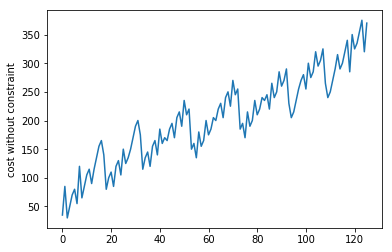

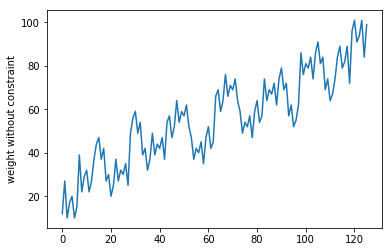

In [68]:
plot_all("small_data.txt")

In [ ]:
##### Now it is time to move to creating a QUBO - Quadratic Unconstrained Binary Optimization version of this problem

In [ ]:
# The first and most necessary step is to negate the problem. Since we will not be maximizing cost, but we will need to find
# the minimum cost.  Since DWave only finds the lowest energy value, it is important to create a formulation where
# the answer is at a minimum

In [79]:
def plot_all_neg(file_name):
    from itertools import combinations
    import numpy as np
    import matplotlib.pyplot as plt
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    
    N=len(c)
    for i in range (N):       #negating the cost values
        c[i]=-c[i]
    c_max=0
    w_max=0
    max_list=[]
    
    plot_w=[]
    plot_c=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): # allcombinations of n items
            
            
            
            plot_c.append(sum(list(i_list),c))  #c_max updated the cost of the current list of items
            plot_w.append(sum(list(i_list),w))  #w_max upated to the weifht of the current items
            max_list=list(i_list)
            print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))
    plt.plot(plot_c)
    plt.ylabel('cost without constraint')
    plt.show()
    plt.plot(plot_w)
    plt.ylabel('weight without constraint')
    plt.show()
    return

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 -35
[1] 27 -85
[2] 10 -30
[3] 17 -50
[4] 20 -70
[5] 10 -80
[6] 15 -55
[0, 1] 39 -120
[0, 2] 22 -65
[0, 3] 29 -85
[0, 4] 32 -105
[0, 5] 22 -115
[0, 6] 27 -90
[1, 2] 37 -115
[1, 3] 44 -135
[1, 4] 47 -155
[1, 5] 37 -165
[1, 6] 42 -140
[2, 3] 27 -80
[2, 4] 30 -100
[2, 5] 20 -110
[2, 6] 25 -85
[3, 4] 37 -120
[3, 5] 27 -130
[3, 6] 32 -105
[4, 5] 30 -150
[4, 6] 35 -125
[5, 6] 25 -135
[0, 1, 2] 49 -150
[0, 1, 3] 56 -170
[0, 1, 4] 59 -190
[0, 1, 5] 49 -200
[0, 1, 6] 54 -175
[0, 2, 3] 39 -115
[0, 2, 4] 42 -135
[0, 2, 5] 32 -145
[0, 2, 6] 37 -120
[0, 3, 4] 49 -155
[0, 3, 5] 39 -165
[0, 3, 6] 44 -140
[0, 4, 5] 42 -185
[0, 4, 6] 47 -160
[0, 5, 6] 37 -170
[1, 2, 3] 54 -165
[1, 2, 4] 57 -185
[1, 2, 5] 47 -195
[1, 2, 6] 52 -170
[1, 3, 4] 64 -205
[1, 3, 5] 54 -215
[1, 3, 6] 59 -190
[1, 4, 5] 57 -235
[1, 4, 6] 62 -210
[1, 5, 6] 52 -220
[2, 3, 4] 47 -150
[2, 3, 5] 37 -160

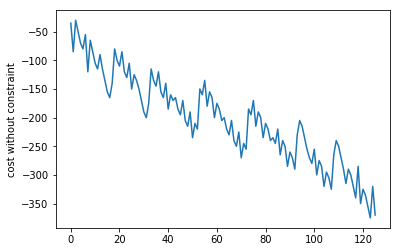

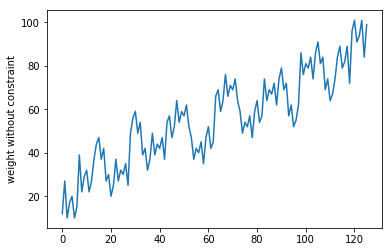

In [80]:
plot_all_neg("small_data.txt")

In [81]:
def plot_knapsack_neg(file_name,w_capacity):
    from itertools import combinations
    import numpy as np
    import matplotlib.pyplot as plt
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    N=len(c)
    for i in range (N):
        c[i]=-c[i]
    
    c_min=0  # removed c_max
    w_max=0
    max_list=[]
    
    plot_w=[]
    plot_c=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): 
            
            if sum(list(i_list),w)<=w_capacity: 
                if sum(list(i_list),c)<c_min:  # looking for lower values now

                    plot_c.append(sum(list(i_list),c))  
                    plot_w.append(sum(list(i_list),w))  
                    max_list=list(i_list)
                    print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))
    plt.plot(plot_c)
    plt.ylabel('cost with constraint')
    plt.show()
    plt.plot(plot_w)
    plt.ylabel('weight with constraint')
    plt.show()
    return

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 -35
[1] 27 -85
[2] 10 -30
[3] 17 -50
[4] 20 -70
[5] 10 -80
[6] 15 -55
[0, 1] 39 -120
[0, 2] 22 -65
[0, 3] 29 -85
[0, 4] 32 -105
[0, 5] 22 -115
[0, 6] 27 -90
[1, 2] 37 -115
[1, 3] 44 -135
[1, 4] 47 -155
[1, 5] 37 -165
[1, 6] 42 -140
[2, 3] 27 -80
[2, 4] 30 -100
[2, 5] 20 -110
[2, 6] 25 -85
[3, 4] 37 -120
[3, 5] 27 -130
[3, 6] 32 -105
[4, 5] 30 -150
[4, 6] 35 -125
[5, 6] 25 -135
[0, 1, 2] 49 -150
[0, 1, 5] 49 -200
[0, 2, 3] 39 -115
[0, 2, 4] 42 -135
[0, 2, 5] 32 -145
[0, 2, 6] 37 -120
[0, 3, 4] 49 -155
[0, 3, 5] 39 -165
[0, 3, 6] 44 -140
[0, 4, 5] 42 -185
[0, 4, 6] 47 -160
[0, 5, 6] 37 -170
[1, 2, 5] 47 -195
[2, 3, 4] 47 -150
[2, 3, 5] 37 -160
[2, 3, 6] 42 -135
[2, 4, 5] 40 -180
[2, 4, 6] 45 -155
[2, 5, 6] 35 -165
[3, 4, 5] 47 -200
[3, 5, 6] 42 -185
[4, 5, 6] 45 -205
[0, 2, 3, 5] 49 -195
[0, 2, 5, 6] 47 -200


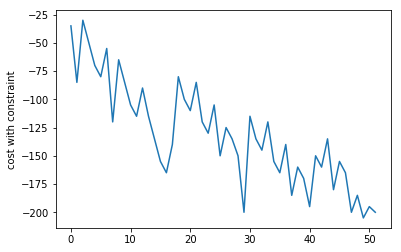

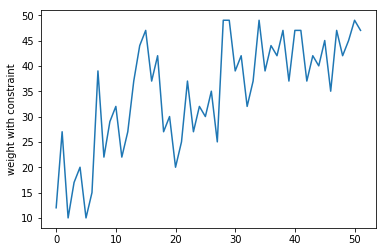

In [82]:
plot_knapsack_neg("small_data.txt", 50)

In [ ]:
# How do we build a QUBO that will retain this property. It needs to find item combinations with the lowest cost, 
# without violating the weight constraints